<a href="https://colab.research.google.com/github/vineet1947/general_code-_files-/blob/main/ML_02_%2CClassifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification



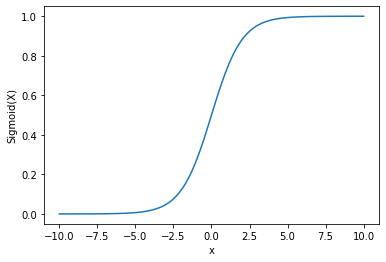

In [8]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
url =  'https://raw.githubusercontent.com/vineet1947/data-sets-/main/dataset1.csv'

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,4.5192,2.6487,1.0
0,2.4443,1.5438,1.0
1,4.2409,1.8990,1.0
2,5.8097,2.4711,1.0
3,6.4423,3.3590,1.0
4,5.8097,3.2406,1.0


Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


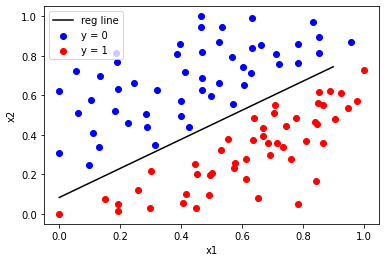

In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def loadCSV(filename):
	'''
	function to load dataset
	'''
	with open(filename,"r") as csvfile:
		lines = csv.reader(csvfile)
		dataset = list(lines)
		for i in range(len(dataset)):
			dataset[i] = [float(x) for x in dataset[i]]	
	return np.array(dataset)


def normalize(X):
	'''
	function to normalize feature matrix, X
	'''
	mins = np.min(X, axis = 0)
	maxs = np.max(X, axis = 0)
	rng = maxs - mins
	norm_X = 1 - ((maxs - X)/rng)
	return norm_X


def logistic_func(beta, X):
	'''
	logistic(sigmoid) function
	'''
	return 1.0/(1 + np.exp(-np.dot(X, beta.T)))


def log_gradient(beta, X, y):
	'''
	logistic gradient function
	'''
	first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
	final_calc = np.dot(first_calc.T, X)
	return final_calc


def cost_func(beta, X, y):
	'''
	cost function, J
	'''
	log_func_v = logistic_func(beta, X)
	y = np.squeeze(y)
	step1 = y * np.log(log_func_v)
	step2 = (1 - y) * np.log(1 - log_func_v)
	final = -step1 - step2
	return np.mean(final)


def grad_desc(X, y, beta, lr=.01, converge_change=.001):
	'''
	gradient descent function
	'''
	cost = cost_func(beta, X, y)
	change_cost = 1
	num_iter = 1
	
	while(change_cost > converge_change):
		old_cost = cost
		beta = beta - (lr * log_gradient(beta, X, y))
		cost = cost_func(beta, X, y)
		change_cost = old_cost - cost
		num_iter += 1
	
	return beta, num_iter


def pred_values(beta, X):
	'''
	function to predict labels
	'''
	pred_prob = logistic_func(beta, X)
	pred_value = np.where(pred_prob >= .5, 1, 0)
	return np.squeeze(pred_value)


def plot_reg(X, y, beta):
	'''
	function to plot decision boundary
	'''
	# labelled observations
	x_0 = X[np.where(y == 0.0)]
	x_1 = X[np.where(y == 1.0)]
	
	# plotting points with diff color for diff label
	plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0')
	plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1')
	
	# plotting decision boundary
	x1 = np.arange(0, 1, 0.1)
	x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
	plt.plot(x1, x2, c='k', label='reg line')

	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.legend()
	plt.show()
	

	
if __name__ == "__main__":
	# load the dataset
	dataset = loadCSV('dataset1.csv')
	
	# normalizing feature matrix
	X = normalize(dataset[:, :-1])
	
	# stacking columns with all ones in feature matrix
	X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))

	# response vector
	y = dataset[:, -1]

	# initial beta values
	beta = np.matrix(np.zeros(X.shape[1]))

	# beta values after running gradient descent
	beta, num_iter = grad_desc(X, y, beta)

	# estimated beta values and number of iterations
	print("Estimated regression coefficients:", beta)
	print("No. of iterations:", num_iter)

	# predicted labels
	y_pred = pred_values(beta, X)
	
	# number of correctly predicted labels
	print("Correctly predicted labels:", np.sum(y == y_pred))
	
	# plotting regression line
	plot_reg(X, y, beta)


#Accuracy, Precision, Recall & F1-Score

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
#
# Load the breast cancer data set
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [2]:
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

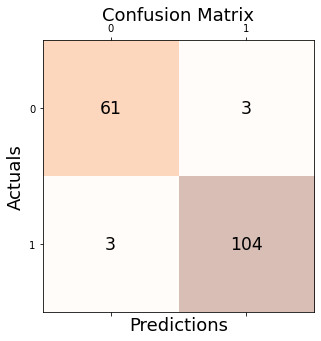

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [4]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.972


In [5]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.972


In [6]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.965


In [7]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.972
